In [1]:
# 读取数据并进行预处理
data = """
"Month","Sales"
"1-01",266.0
"1-02",145.9
"1-03",183.1
"1-04",119.3
"1-05",180.3
"1-06",168.5
"1-07",231.8
"1-08",224.5
"1-09",192.8
"1-10",122.9
"1-11",336.5
"1-12",185.9
"2-01",194.3
"2-02",149.5
"2-03",210.1
"2-04",273.3
"2-05",191.4
"2-06",287.0
"2-07",226.0
"2-08",303.6
"2-09",289.9
"2-10",421.6
"2-11",264.5
"2-12",342.3
"3-01",339.7
"3-02",440.4
"3-03",315.9
"3-04",439.3
"3-05",401.3
"3-06",437.4
"3-07",575.5
"3-08",407.6
"3-09",682.0
"3-10",475.3
"3-11",581.3
"3-12",646.9
"""

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import io

In [3]:
# 将字符串转换为DataFrame
data = pd.read_csv(io.StringIO(data))

In [4]:
# 将'Month'列转换为日期类型
data['Month'] = pd.to_datetime(data['Month'], format='%m-%d')
# 将'Month'列转换为日期类型，并设置年份为2024年
data['Month'] = pd.to_datetime(data['Month'], format='%y-%m', yearfirst=True).dt.strftime('2024-%m')
print(data)
# 将日期列设置为索引
data.set_index('Month', inplace=True)

      Month  Sales
0   2024-01  266.0
1   2024-01  145.9
2   2024-01  183.1
3   2024-01  119.3
4   2024-01  180.3
5   2024-01  168.5
6   2024-01  231.8
7   2024-01  224.5
8   2024-01  192.8
9   2024-01  122.9
10  2024-01  336.5
11  2024-01  185.9
12  2024-02  194.3
13  2024-02  149.5
14  2024-02  210.1
15  2024-02  273.3
16  2024-02  191.4
17  2024-02  287.0
18  2024-02  226.0
19  2024-02  303.6
20  2024-02  289.9
21  2024-02  421.6
22  2024-02  264.5
23  2024-02  342.3
24  2024-03  339.7
25  2024-03  440.4
26  2024-03  315.9
27  2024-03  439.3
28  2024-03  401.3
29  2024-03  437.4
30  2024-03  575.5
31  2024-03  407.6
32  2024-03  682.0
33  2024-03  475.3
34  2024-03  581.3
35  2024-03  646.9


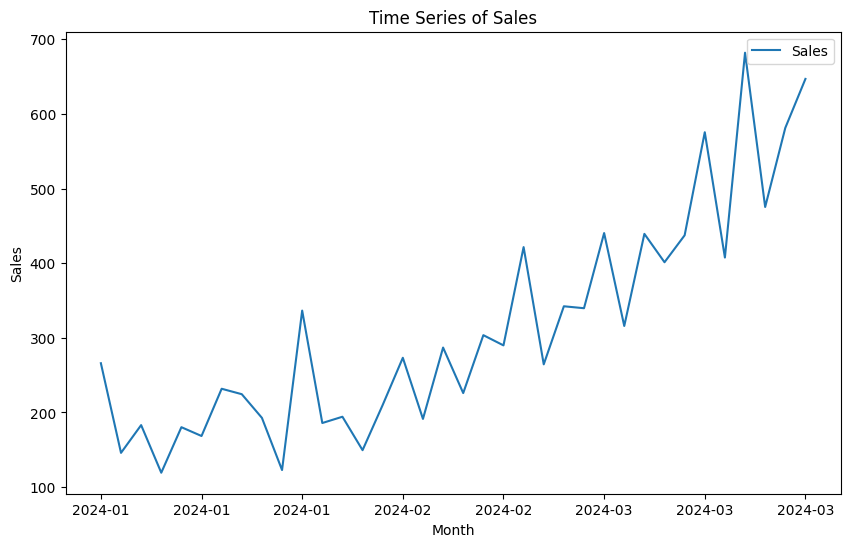

In [5]:
# 绘制时序图
data.plot(figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Time Series of Sales')
plt.show()

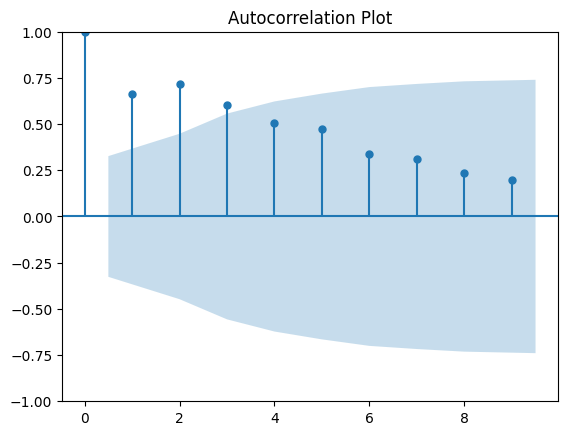

In [6]:
# 检测序列的平稳性
# 自相关图
plot_acf(data, lags=9)
plt.title('Autocorrelation Plot')
plt.show()

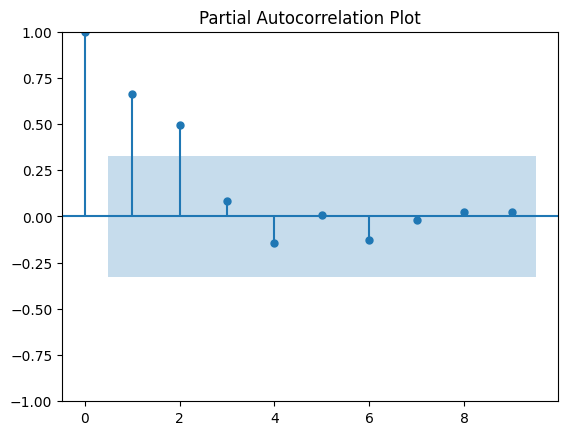

In [7]:
# 偏相关图
plot_pacf(data, lags=9)
plt.title('Partial Autocorrelation Plot')
plt.show()

In [8]:
# ADF检验
adf_result = adfuller(data['Sales'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: 3.060142083641181
p-value: 1.0
Critical Values: {'1%': np.float64(-3.7238633119999998), '5%': np.float64(-2.98648896), '10%': np.float64(-2.6328004)}


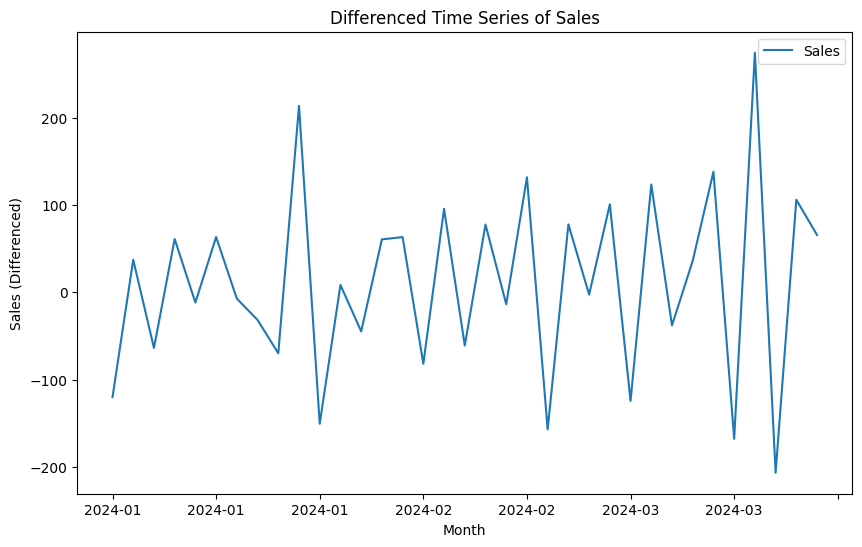

In [9]:
# 差分处理
diff_data = data.diff().dropna()
 
# 绘制差分后的时序图
diff_data.plot(figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Sales (Differenced)')
plt.title('Differenced Time Series of Sales')
plt.show()

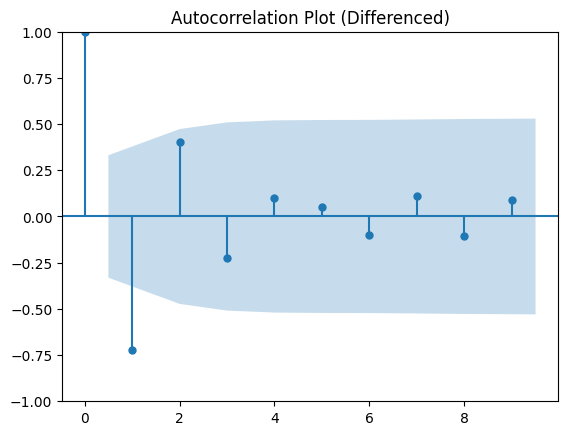

In [10]:
# 差分后的序列平稳性检测
# 自相关图
plot_acf(diff_data, lags=9)
plt.title('Autocorrelation Plot (Differenced)')
plt.show()

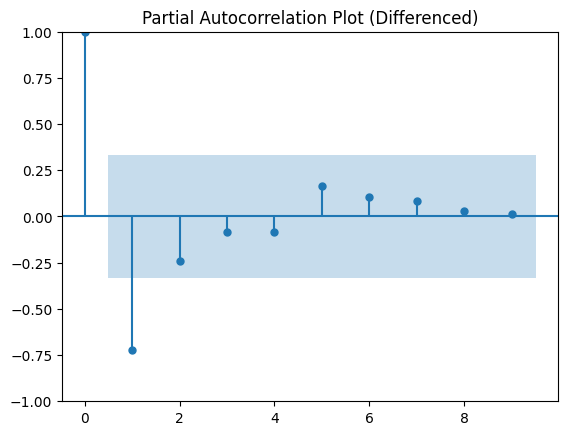

In [11]:
# 偏相关图
plot_pacf(diff_data, lags=9)
plt.title('Partial Autocorrelation Plot (Differenced)')
plt.show()

In [12]:
# ADF检验
adf_result_diff = adfuller(diff_data['Sales'])
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])
print('Critical Values (Differenced):', adf_result_diff[4])

ADF Statistic (Differenced): -7.249074055553854
p-value (Differenced): 1.7998574141687034e-10
Critical Values (Differenced): {'1%': np.float64(-3.6461350877925254), '5%': np.float64(-2.954126991123355), '10%': np.float64(-2.6159676124885216)}


In [13]:
# 使用ARIMA模型建模
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
 
# 打印模型的概要信息
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Sat, 13 Jul 2024   AIC                            406.782
Time:                        16:11:11   BIC                            411.448
Sample:                             0   HQIC                           408.393
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0426   1386.817      3.881      0.0

/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# 预测未来5个月的销售额
forecast_steps = 5
forecast = model_fit.forecast(steps=5)

/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
# 生成未来几个月的日期
last_month = data.index[-1]
future_months = pd.date_range(start=last_month, periods=forecast_steps + 1, freq='M')[1:]
 
# 创建包含日期和预测销售额的DataFrame
forecast_df = pd.DataFrame({'Month': future_months, 'Forecasted Sales': forecast})
 
# 输出预测结果
print('Forecasted Sales for the next 5 months:')
print(forecast_df)

Forecasted Sales for the next 5 months:
        Month  Forecasted Sales
36 2024-04-30        573.210555
37 2024-05-31        617.449903
38 2024-06-30        590.890877
39 2024-07-31        606.835548
40 2024-08-31        597.263189


/tmp/ipykernel_2661663/3657030671.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_months = pd.date_range(start=last_month, periods=forecast_steps + 1, freq='M')[1:]


In [16]:
# VARMA 
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
  v1 = random()
  v2 = v1 + random()
  row = [v1, v2]
  data.append(row)
# fit model
model = VARMAX(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()
print(yhat)

/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


[[0.40713975 1.01285654]]


/home/drew/miniconda3/envs/mathmodel/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
import numpy as np
np.array(data).shape

(100, 2)